In [1]:
#import dependency
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

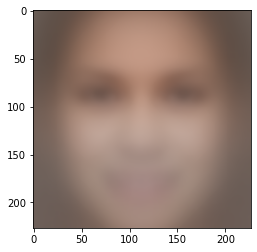

In [2]:
#import trained model and mean_image
model = keras.models.load_model('fitted_model')
model.summary()
mean_image_raw = cv2.imread('./mean_img.png')
mean_img = np.array(mean_image_raw).astype('float32')
plt.imshow(mean_img.astype('uint8'))

In [3]:
#webcam video capture utility
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    _, img = cap.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        pred_img = img[y:y+h, x:x+w]
        pred_img = cv2.resize(pred_img, (227, 227))
        pred_img = pred_img - mean_img
        pred_test = np.array(pred_img).astype('float32').reshape(-1, 227, 227, 3)
        result = model.predict(pred_test)
#         print(result)
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        if result[0][0] >= result[0][1]:
            cv2.putText(img, 'With Mask', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
        elif result[0][1] > result[0][0]:
            cv2.putText(img, 'Without Mask', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
        
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        cv2.destroyAllWindows()
        break
        
cap.release()